# Auto Encoders
Auto encoders are artificial neural networks capable of learning dense representations of the input data, called latent representations without any supervision.


In [2]:
#@ Importing mnist datasets
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full),(X_test,y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [3]:
#@ Normalizing datasets
X_train, X_valid , X_test = X_train/255. , X_valid/255. , X_test/255.

In [8]:
#@ Implementation of stacked autoencoders using keras

stacked_encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
])

stacked_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(28*28),
    tf.keras.layers.Reshape([28,28])
])

stacked_ae = tf.keras.Sequential([stacked_encoder,stacked_decoder])

stacked_ae.compile(loss="mse", optimizer="nadam")
history = stacked_ae.fit(X_train, X_train ,epochs=20, validation_data=(X_valid,X_valid))

Epoch 1/20
1719/1719 [==============================] - 21s 8ms/step - loss: 0.0235 - val_loss: 0.0180
Epoch 2/20
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0169 - val_loss: 0.0162
Epoch 3/20
1719/1719 [==============================] - 13s 8ms/step - loss: 0.0156 - val_loss: 0.0154
Epoch 4/20
1719/1719 [==============================] - 13s 7ms/step - loss: 0.0149 - val_loss: 0.0151
Epoch 5/20
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0146 - val_loss: 0.0147
Epoch 6/20
1719/1719 [==============================] - 13s 7ms/step - loss: 0.0144 - val_loss: 0.0144
Epoch 7/20
1719/1719 [==============================] - 13s 7ms/step - loss: 0.0142 - val_loss: 0.0145
Epoch 8/20
1719/1719 [==============================] - 13s 7ms/step - loss: 0.0141 - val_loss: 0.0142
Epoch 9/20
1719/1719 [==============================] - 13s 7ms/step - loss: 0.0139 - val_loss: 0.0141
Epoch 10/20
1719/1719 [==============================] - 12s 7ms/step - l

1/1 [==============================] - 0s 176ms/step


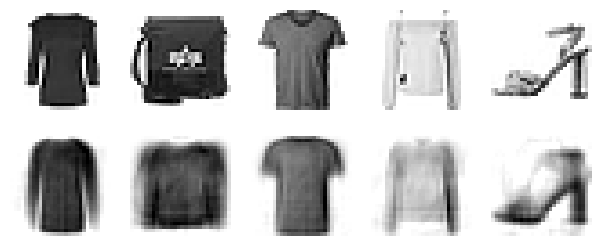

In [9]:
#@ Visualizing the result
import numpy as np
import matplotlib.pyplot as plt
def plot_reconstructions(model, images=X_valid, n_images=5):
 reconstructions = np.clip(model.predict(images[:n_images]), 0, 1)
 fig = plt.figure(figsize=(n_images * 1.5, 3))
 for image_index in range(n_images):
    plt.subplot(2, n_images, 1 + image_index)
    plt.imshow(images[image_index], cmap="binary")
    plt.axis("off")
    plt.subplot(2, n_images, 1 + n_images + image_index)
    plt.imshow(reconstructions[image_index], cmap="binary")
    plt.axis("off")
plot_reconstructions(stacked_ae)
plt.show()